In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, confusion_matrix, classification_report, precision_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme('notebook')

In [4]:
file_path = r".csv/Absenteeism_preprocessed_data.csv"
data = pd.read_csv(file_path)
data.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0


In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X, y

(     Reason_1  Reason_2  Reason_3  Reason_4  Month Value  Day of the Week  \
 0           0         0         0         1            7                1   
 1           0         0         0         0            7                1   
 2           0         0         0         1            7                2   
 3           1         0         0         0            7                3   
 4           0         0         0         1            7                3   
 ..        ...       ...       ...       ...          ...              ...   
 695         1         0         0         0            5                2   
 696         1         0         0         0            5                2   
 697         1         0         0         0            5                3   
 698         0         0         0         1            5                3   
 699         0         0         0         1            5                3   
 
      Transportation Expense  Distance to Work  Age  Daily Wor

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

In [13]:
rfc = RandomForestClassifier(random_state= 42, class_weight= 'balanced', verbose= 1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search_rf = GridSearchCV(rfc, param_grid= param_grid, cv= 5, n_jobs= 2, scoring= 'f1')
grid_search_rf.fit(X_train, y_train)

best_model = grid_search_rf.best_estimator_

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [15]:
y_pred_rf = best_model.predict(X_test)
print(f"F1 Score: {f1_score(y_test, y_pred_rf)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_rf)}")
print(f"Recall Score: {recall_score(y_test, y_pred_rf)}")
print(f"Precision Score: {precision_score(y_test, y_pred_rf)}")

F1 Score: 0.7536231884057971
Confusion Matrix:
 [[54 22]
 [12 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76        76
           1       0.70      0.81      0.75        64

    accuracy                           0.76       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.77      0.76      0.76       140

Recall Score: 0.8125
Precision Score: 0.7027027027027027


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


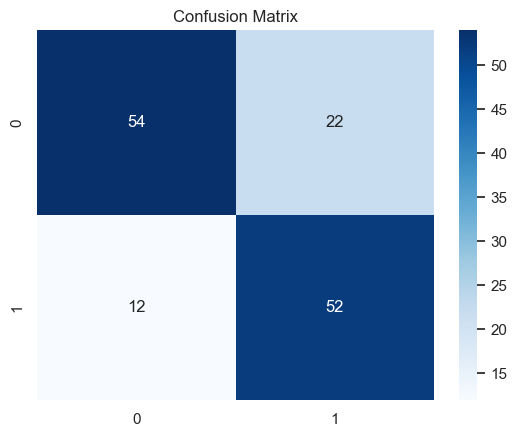

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

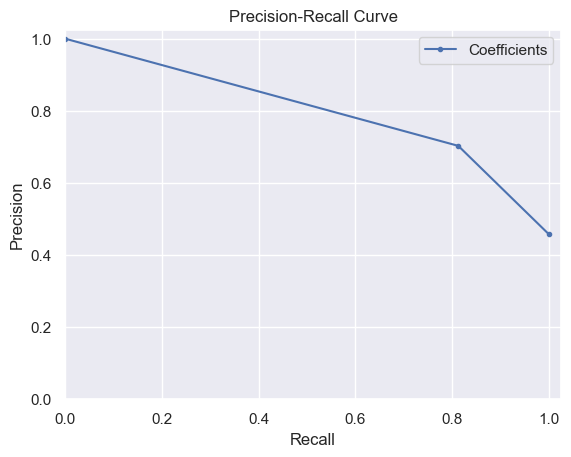

In [22]:
precision_values, recall_values, _ = precision_recall_curve(y_test, y_pred_rf)

plt.figure()
plt.plot(recall_values, precision_values, marker='.', label='Coefficients')
plt.xlabel('Recall')
plt.xlim((0.0, 1.025))
plt.ylabel('Precision')
plt.ylim((0.0, 1.025))
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### Key Metrics

1. **F1 Score**:
   - The overall F1 score is \( 0.7536 \). This indicates a balance between precision and recall, showing the model's effectiveness in both capturing positive cases and maintaining correct positive predictions.

2. **Confusion Matrix**:
   - \[
     \begin{array}{cc}
     & \text{Predicted} \\
     & 0 & 1 \\
     \text{Actual} & \begin{bmatrix}
     54 & 22 \\
     12 & 52 \\
     \end{bmatrix}
     \end{array}
     \]
   - **True Positives (TP)**: 52
   - **True Negatives (TN)**: 54
   - **False Positives (FP)**: 22
   - **False Negatives (FN)**: 12

3. **Classification Report**:
   - **Class 0** (Negative class):
     - Precision: 0.82
     - Recall: 0.71
     - F1-score: 0.76
   - **Class 1** (Positive class):
     - Precision: 0.70
     - Recall: 0.81
     - F1-score: 0.75
   - **Accuracy**: 0.76
   - **Macro Average**: Precision = 0.76, Recall = 0.76, F1-score = 0.76
   - **Weighted Average**: Precision = 0.77, Recall = 0.76, F1-score = 0.76

4. **Recall Score**: 0.8125 (Specific to the positive class, i.e., class 1)
5. **Precision Score**: 0.7027 (Specific to the positive class, i.e., class 1)

### Interpretation

1. **Model Performance**:
   - The model has a good balance between precision and recall, as indicated by the overall F1 score.
   - The slightly higher recall (0.81 for class 1) suggests that the model is better at capturing most of the actual positive cases, even if it means predicting some false positives.
   - The precision for class 1 (0.70) indicates that when the model predicts a positive case, it is correct 70% of the time.

2. **Confusion Matrix Insights**:
   - The model correctly identified 54 out of 76 actual negatives (71%) and 52 out of 64 actual positives (81%).
   - There are more false positives (22) than false negatives (12), suggesting the model is slightly biased towards predicting positive cases.

3. **Class-wise Performance**:
   - **Class 0** (Negative class) has higher precision (0.82) but lower recall (0.71). This means the model is good at correctly identifying negatives but misses some negatives.
   - **Class 1** (Positive class) has higher recall (0.81) but lower precision (0.70). This means the model is good at identifying most positives but includes some false positives.

### Recommendations

1. **Threshold Adjustment**:
   - You might consider adjusting the decision threshold to find a better balance between precision and recall if your application has specific needs (e.g., more tolerance for false positives or false negatives).

2. **Further Evaluation**:
   - Evaluate the impact of false positives and false negatives in your specific context to decide whether the current balance is acceptable.

3. **Model Improvement**:
   - Explore additional features or more complex models to potentially improve the precision and recall further.

4. **Cross-Validation**:
   - Ensure that cross-validation is used to confirm that these results are consistent across different subsets of the data.

By analyzing these metrics and considering the context of your application, you can better understand how well your model is performing and what steps might be needed to improve it. If you have specific goals or constraints, adjusting your model accordingly will help achieve optimal performance.